In [12]:
from IPython import get_ipython

 ---
 ## Importing needed libraries:
 ---

In [13]:
import numpy as np 
import pandas as pd 
import os 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set searborn as default

import folium       # for map
import calendar     # time realted columns from the dataset 

 ---
 ## Loading data
 ---

In [14]:
# Importing dataset using os 
"""
fileName ='Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), '..' ,'Datasets', fileName))
"""

Data = pd.read_csv('../../../x.csv')

# Removing the 2018 (since we don't have full data for 2018)
Data['Year'] = pd.to_datetime(Data['Date']).dt.year
Data = Data[Data['Year'] != 2018]

 ---
 ## Part 1: Temporal Patterns
 ---
 We look only at the focus-crimes in the exercise below

In [19]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimes_lst = list(focuscrimes)
data = Data[Data['Category'].isin(list(focuscrimes))]

 **Exercise**: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).

 In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

> * **Weekly patterns**. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

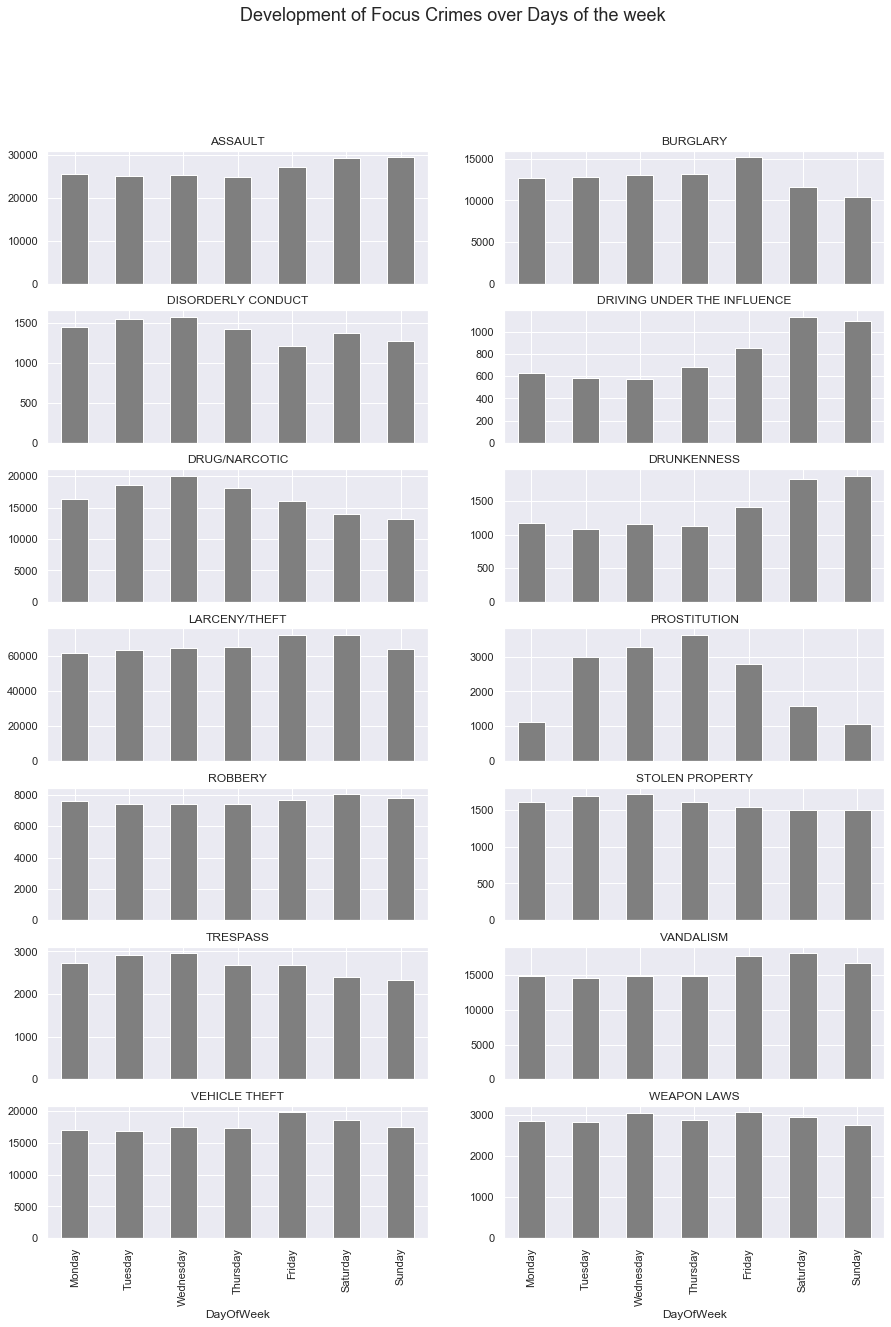

In [6]:
# First Transfer 'DayOfWeek' from Categorical to ordered Categorical variable 
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=cats, ordered=True)

# Then order the focuscrimes_lst to match the given figures order
focuscrimes_lst.sort()

# Finally start plotting 
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Days of the week', fontsize=18)
grouping = data.groupby(['Category','DayOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    grouping[focuscrimes_lst[i]].plot(kind='bar',ax=ax, color= 'tab:gray')


*Figure 1.1: Daily development of Focus Crimes*

**Comments:** 

The *weekly patterns* of certain focus crimes in San Francisco PD can be seen above. 

Weekends is usually considered the rest time period of the week, 
where the majority end their Workweek <sup>[ref](https://www.globalbankingandfinance.com/what-are-business-days-around-the-world/)</sup>. 
Due to that, over the weekend, 
an expected rising is observed in certain crimes like the **Drunkeness** and 
**Driving under the Influence**. 
We would expect **Disorderly Conduct** to spike at weekends, 
but there has been many records of the crime during the workweek too. 
A more serious type of crime, 
**Vandalism** is finding its riasing also near the weekend, 
more specifically on Fridays and Saturdays. 
**Assault** has also it's rising over the weekend. 

However, **crimes related to thievery** tend to happen more in the duration of the workweek, since (probably) the police alertness (as well as the households owners) over the weekend could play an important role for the offenders. 
Crimes like **Burglary**, **Stolen Property** and **Tresspass** see their spike over the workweek and lower at weekends. 
**Drug/narcotic** arrests happen more also over the workweek and not during the weekends. 

**Prostitution** related crime arrests happen mainly throughout the workweek, 
in an attempt for the police force to handle the sex workers of San Francisco. 
To shed some light, in 2016, as sex workers engaged in ongoing negotiations with the San Francisco Police Department (SFPD) and the District Attorney surrounding the amnesty policy, law enforcement agencies across the San Francisco Bay Area — including the San Francisco Police Department — **found themselves deeply embroiled in a police sex scandal of seismic proportions**. More can be read [here](https://nextcity.org/daily/entry/how-sex-workers-made-san-francisco-safer-for-everyone).

Other crime activities seem to happen every day on a constant rate.

> * **The months**. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

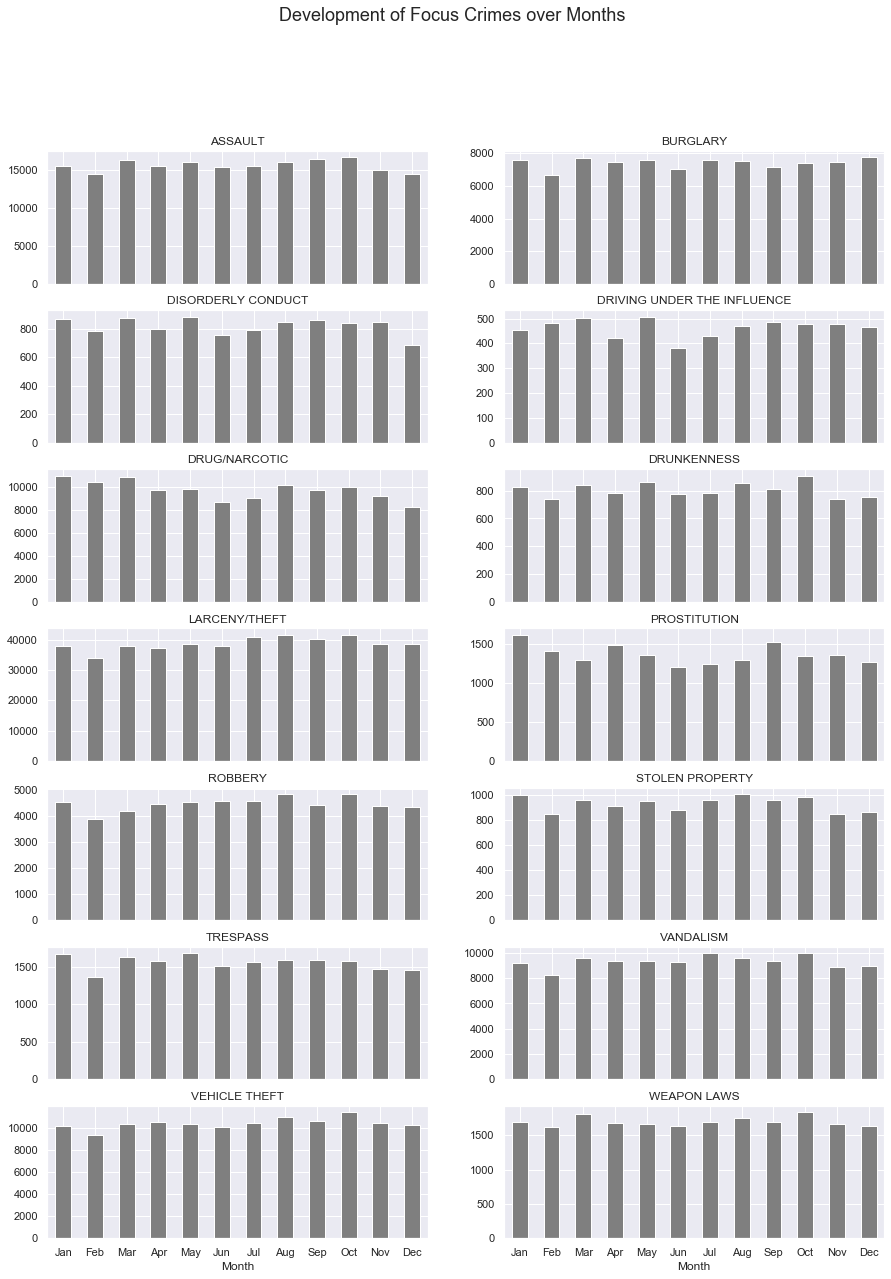

In [7]:
# First add 'Month_Numeric' feature by transfering 'Date'
data['Month_Numeric'] = pd.to_datetime(data['Date']).dt.month

# Then Transfer 'Month_Numeric' to ordered Categorical 'Month'
data['Month'] = data['Month_Numeric'].apply(lambda x: calendar.month_abbr[x])
cats = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',  'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec',]
data['Month'] = pd.Categorical(data['Month'], categories=cats, ordered=True)

# Finally start plotting
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Months', fontsize=18)
grouping = data.groupby(['Category','Month'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    grouping[focuscrimes_lst[i]].plot(kind='bar',ax=ax, rot=0, color= 'tab:gray')


*Figure 1.2: Monthly development of Focus Crimes*

**Comments:**

Above one can see the *monthly patterns* of certain focus crimes in San Franscisco PD.

A certain pattern can be seen in crimes: **Driving under the influence**, **Disorderly conduct**, **Drug/narcotic** and **Prostitution**. More specifically, in the **June** a sudden decline of PD records tend to happen in this specific month. For the case of **Prostitution** the decline continues for the whole summer, only to see a spike again on September. 

The other type of crimes, one could say, they fluctuate during the months without a specific noticable pattern. **Assault** records, tend to happen less during the end of the year, on months November and December.

> * **The 24 hour cycle**. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

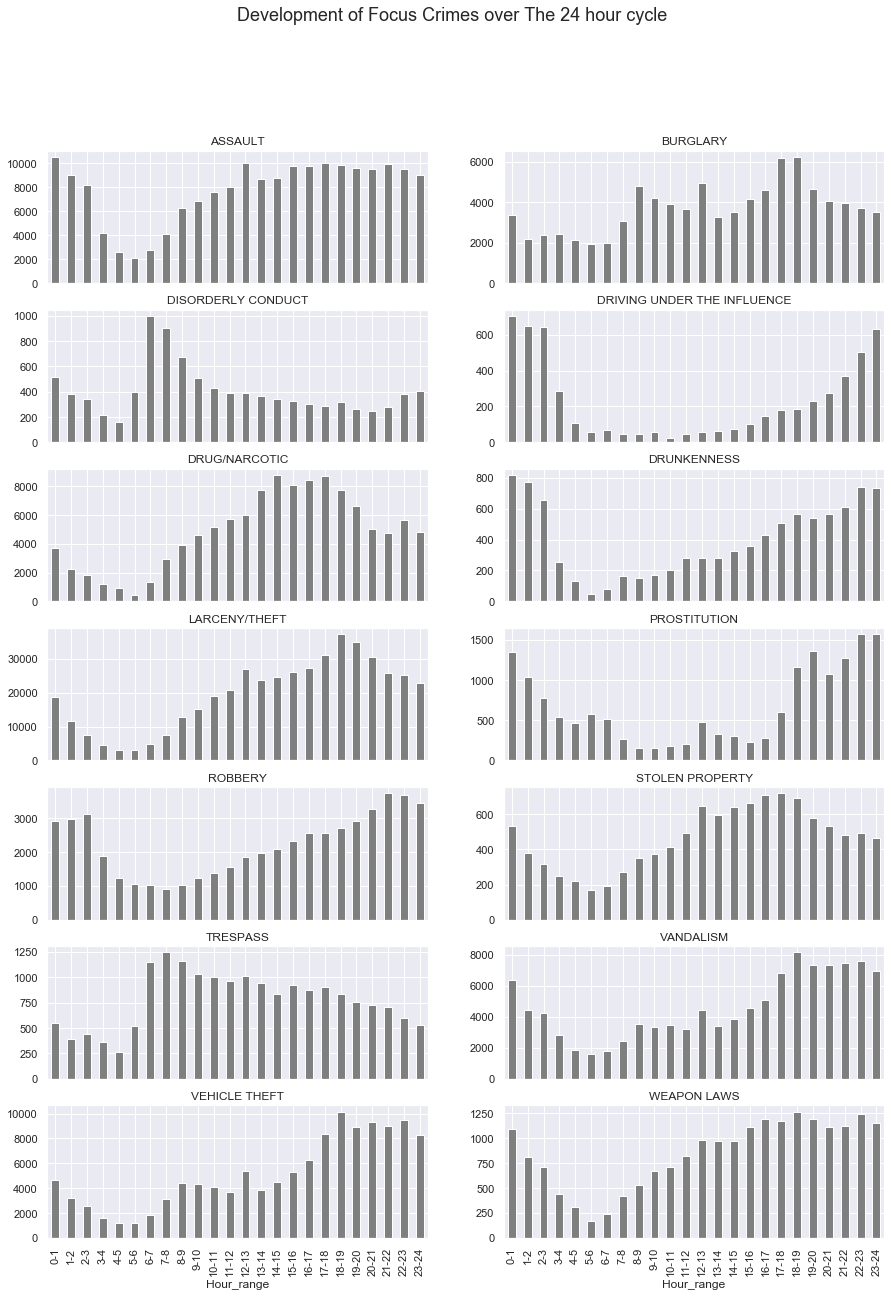

In [8]:
# First add 'Hour' feature by transfering 'Date' to numeric 'Hour' 
data['Hour'] = pd.to_datetime(data['Time']).dt.hour # keep it for later usage

# Then add the ordered categorical feature 'Hour_range'  
data['Hour_range'] = data['Hour'].apply(lambda x: str(x)+"-"+str(x+1))
cats = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13',
        '13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']
data['Hour_range'] = pd.Categorical(data['Hour_range'], categories=cats, ordered=True)

# Finally start plotting
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over The 24 hour cycle', fontsize=18)
grouping = data.groupby(['Category','Hour_range'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    grouping[focuscrimes_lst[i]].plot(kind='bar',ax=ax, color= 'tab:gray')


*Figure 1.3: 24-hour cycle development of Focus Crimes*

**Comments:**

Above one can see the *hourly patterns* of certain focus crimes in San Francisco PD.

Overall, many crimes tend to have a  spike around the midnight hours. Those crimes are: **Assault** (an all time high at midnight following until 4 am), **Driving under the influence** (records mostly happen between 11pm to 4am), **Drunkeness** (linear increase throughtout the day with peak at hours 10pm - 3am), **Prostitution** (mostly around 10pm - 4am) and **Robbery** (peak 9pm-3pm).

A few crimes can find their peak hours at midday to evening. **Burglary** understandably peak at morning hours (8-9am), midday(12pm) as well as evening hours at 6-8pm.  **Drug/narcotics** dealers peak at evening hours at 2pm but high activity is observed throughout the whole evening. **Latency/Theft** as well as **Stolen Property** both peak around midday, only to increase in the evening hours. Both **Vandalism** and **Vehicle Theft** peak mostly at evening hours around 6pm-10pm.

Lastly, **Disorderly conduct** as well as **Tresspass** happen mainly at morning hours (7-9am) and gradually lower throughout the rest of the day.

> * **Hours of the week**. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

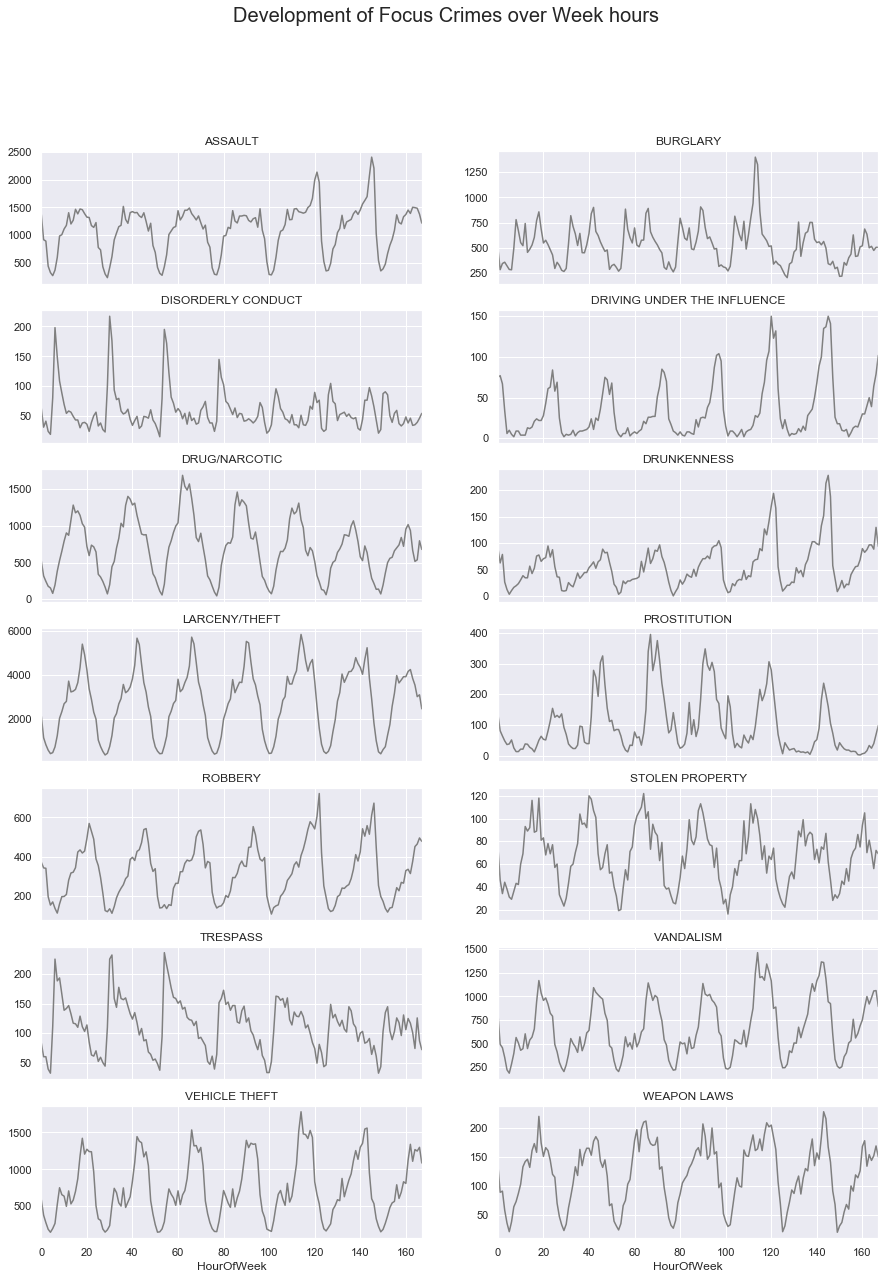

In [9]:
# day_to_num(x)  
#   takes a categorical value from 'DayOfWeek' features and
#   returns a numeric number 1-7 accordingly (1 is Monday).
def day_to_num(x):
    if(x=='Monday'): return 1
    elif(x=='Tuesday'): return 2
    elif(x=='Wednesday'): return 3
    elif(x=='Thursday'): return 4
    elif(x=='Friday'): return 5
    elif(x=='Saturday'): return 6
    elif(x=='Sunday'): return 7
    else: return float('nan')

# First, add 'DayOfWeek_Numeric' feature by applying day_to_num(x) to 'DayOfWeek' 
data['DayOfWeek_Numeric'] = data['DayOfWeek'].apply(lambda x : day_to_num(x)).astype('int64')

# Then, compute the 168 hours of the week.
h_v   = data['Hour'].values              # numpy list of 'hour' values 
d_v   = data['DayOfWeek_Numeric'].values # numpy list of 'DayOfWeek_Numeric' 
data['HourOfWeek'] =  (h_v + ((d_v-1)*24) )

# Finally, start plotting: 
fig, axs = plt.subplots(7, 2,figsize=(15, 20), sharex=True)
fig.suptitle('Development of Focus Crimes over Week hours', fontsize=20)
grouping = data.groupby(['Category','HourOfWeek'])['PdId'].count()
for i,ax in enumerate(axs.flat):
    ax.set(title=focuscrimes_lst[i])
    grouping[focuscrimes_lst[i]].plot(ax=ax, color= 'tab:gray')


*Figure 1.4: Weekly hours development of Focus Crimes*

**Comments:**

Above one can see the *weekly hour patterns* of certain focus crimes in San Francisco PD.

Once again we notice the daily trends *mentioned above* with some better insights about **Burglary**. Burglary peaks highly at Friday, with over the double comparing to other peak weekly hours over the week. Something that is highly understandable as people tend to go outside on friday night (before COVID! | -2017). **Disorderly conduct** and **Trespass** happen mostly on weekly hours on Mondays-Tuesdays-Wednesdays.

 ---
 ## Part 2: Thinking about data and visualization
 ---
 **Exercise:** Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).

> As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

The Pearson correlation shows the linear correlation between two sets of data. It is the covariance of two variables (features) 
divided by the product of the standard deviation of each data variable. The covariance of two variables is a measure of their joint variability, so Pearson correlation is a metric that is determined by multiplying the self variability of variables by the mutual variability of variables.

It is calculated as: <sup>[ref](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)</sup> 
$$\rho_{x,y} =\frac{ cov(x,y) }{\sigma_{x} \sigma_{y}}$$

Thus, it is a normalization of the covariance between the two variables (features) which gives a brief statement, score between -1 and 1, about the strength of the linear relationship between the two data variables (feature).
A score of 0 means no correlation and a score above 0.5 or below -0.5 indicates a correlation,
whereas other scores between -0.5 and 0.5 implies less correlation. <sup>[ref](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)</sup> It is worth mentioning that correlation does not necessarily
imply causation but it’s something to observe. <sup>[ref](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-correlation/correlation-vs-causation.html#:~:text=Correlation%20vs.\protect%20\discretionary%20{\char%20\hyphenchar%20\font%20}{}{},Causation,correlation%20does%20not%20imply%20causation.%E2%80%9D) </sup> 


One example where visualization works better, 
instead of a Pearsons correlation, 
is to **better detect outliers in the data** 
with the form of visualizing. 
Typically, Pearsons corelation gives an output of range $[-1, 1]$, as an indication of how linearly correlated the measured data are, but doesn't give an idea of any existed outliers. <sup> [ref](https://www2.southeastern.edu/Academics/Faculty/dgurney/Math241/StatTopics/ScatAnal.htm#:~:text=If%20there%20is%20a%20regression,plot%2C%20you%20can%20identify%20outliers.&text=If%20a%20number%20of%20points,then%20there%20is%20no%20outlier.)</sup>

> What is the difference between a bar-chart and a histogram?

On the **bar-chart**, when we have a lot of values in the x-axis, *the chart becomes too "crowdy"* leaving us unable to draw many insights. Instead of simplyfing statistics the user has to digg further into to graph to draw insights. However, to better understand the trends, we can use a **histogram**. 

In *histogram* we define some bins and we define the number of values we see in those bins. Drawing insights from those bins is also critical to choose a right bin-size, this can make a histogram extremely insightful or on the other side hide information or even worse depict a wrongly stastistic.

Into the differences between the two, the *histogram* refers to a graphical representation which displays data by means of bars in order to display a numerical data frequency, while the *bar graph* is a graphical representation of data which uses bars in order to compare various data categories. In *histogram* it is crusial not not change the order of the blocks, whereas in *bar charts* one can easily do (ascending or descending order is a common representation of various bar charts). Histogram, also, is used for non-discrete variable distribution, while *bar graph* is used to compare discrete variables. 

*Generally*, *histograms* are used to show distributions of variables while *bar charts* are used to compare variables.  Histograms plot quantitative data with ranges of the data grouped into bins or intervals while bar charts plot categorical data.

> I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

There are a few general rules for choosing bin-size:<sup>[ref](https://www.statisticshowto.com/choose-bin-sizes-statistics/) </sup>
* Bins should be all the same size.
* Bins should include all of the data, even outliers. 
* Boundaries for bins should land at whole numbers whenever possible (this makes the chart easier to read).
* Choose between 5 and 20 bins. The larger the data set, the more likely you’ll want a large number of bins.
* Try to make your data set evenly divisible by the number of bins.

<br/><br/>

However, there are various useful guidelines and rules of thumb for choosing the bin-size.
These methods generally make strong assumptions about the shape of the distribution.

One of them is  **Sturges' formula:**<sup>[ref](https://en.wikipedia.org/wiki/Histogram)</sup>   
It's is derived from a binomial distribution, and can be used for data that is approximately normally distributed. 
It can perform poorly if n < 30 or the data are not normally distributed. It's given by:  
\begin{align} k = {\lceil}{log_{2}n}{\rceil} + 1  \end{align}
where $k$ is the number of bins, $n$ is the number of observations and the braces indicate the ceiling function.  

Alternatively, another rule is **Doane's formula:**<sup>[ref](https://en.wikipedia.org/wiki/Histogram)</sup>  
which is a modification of Sturges' formula that attempts to improve its performance with non-normal data. It's given by:  
\begin{align}  k = 1 + log_{2}(n) + log_{2} (1 + \frac{|g_1|}{\sigma_{g_1}}) \end{align}  
where where $k$ is the number of bins, $n$ is the number of observations,
$g_1$ is the estimated 3rd-moment-skewness of the distribution<sup>[ref](https://en.wikipedia.org/wiki/Skewness#Definition)</sup>  and
$\sigma_{g_1} = \sqrt{\frac{6(n-2)}{(n+1)(n+3)}} $.


 ---
 ## Part 3: Generating important plot types
 ---
 **Exercise**: Let us recreate some plots from DAOST but using our own favorite dataset.

> First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

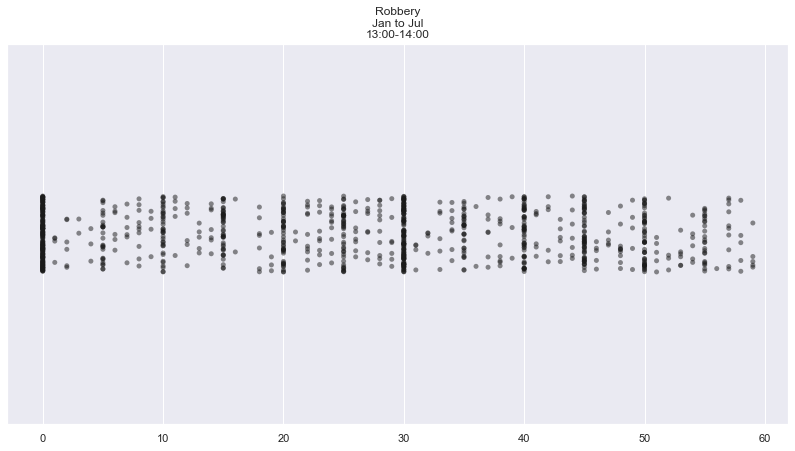

In [10]:
# Crime : ROBBERY 
# Month : from Jan to Jul. 
# Hour  : 13 - 14  
# Time -> Minutes 
# Data  : 2003-2017

data_Jit = data[data['Category']=='ROBBERY'] # Imperically gives a nice jitter-plot 
data_Jit = data_Jit[data_Jit['Month_Numeric']<=6]
data_Jit = data_Jit[data_Jit['Hour']==13].reset_index(drop=True)
data_Jit['Time'] = pd.to_datetime(data_Jit['Time']).dt.minute


plt.figure(figsize=(14, 7))
sns.stripplot(data_Jit['Time'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k').set_title('Robbery\nJan to Jul\n13:00-14:00')
plt.show()


*Figure 3.1: Jitter plot of Robbery crimes from January to July recorded at 2-3pm by SFPD*

**Comments:**  

The figure above shows a jitter-plot of San Francisco January 
**Robbery** crimes 2003-2017 between 13.00 - 14.00 
Which has 995 observation. 
It's also seen that police-folks tendes to note down 
the crime time to the nearest minutes that is divisible by 5.

> Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.)
   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting.

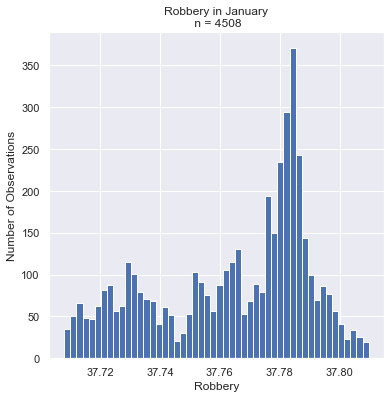

In [11]:
# Histogram 01
# Crime : Robbery
# Month : January 
# Data  : 2003-2017

data_hist1 = data[data['Category'] == 'ROBBERY']
data_hist1 = data_hist1[data_hist1['Month_Numeric']==1]

plt.figure(figsize=(6, 6))
plt.hist(data_hist1['Y'], bins=50) # uses numpy.histogram
plt.title('Robbery in January\n n = '+ str(len(data_hist1)))
plt.xlabel('Robbery')
plt.ylabel('Number of Observations')
plt.show()                                                       

*Figure 3.2: Robbery in January recorded by SFPD*

**Comments:**

The figure above shows a histogram of San Francisco January **Robbery** crimes 2003-2017. 
Which has 4508 observation and 50 bins. 
It's also seen that most of this crimes take place between 
the latitude coordinates  $Y=[37.78,37.79]$ .

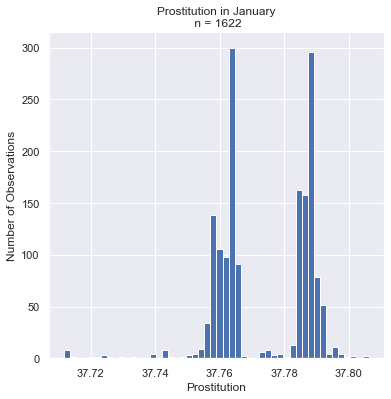

In [12]:
# Histogram 02 
# Crime : prostitution
# Month : January
# Data  : 2003-2017
data_hist2 = data[data['Category'] == 'PROSTITUTION' ]
data_hist2 = data_hist2[data_hist2['Month_Numeric']==1]
plt.figure(figsize=(6, 6))
plt.hist(data_hist2['Y'], bins=50) # uses numpy.histogram
plt.title('Prostitution in January\n n = '+ str(len(data_hist2)) )
plt.xlabel('Prostitution')
plt.ylabel('Number of Observations')
plt.show()    

*Figure 3.3: Prostitution in January recorded by SFPD*

**Comments:**

The figure above shows a histogram of San Francisco January **Prostitution** crimes 2003-2017. 
Which has 1622 observation and 50 bins. 
It's also seen that most of this crimes take place between 
near the latitude coordinates: 37.76 and 37.79.